In [1]:
import pandas as pd
import numpy as np
import sklearn
# math opeations
import math
# produce random numbers
import random
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

import pygal
from IPython.display import SVG, display

# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

#ajout pour faire fonctionner plotly
import sys

# interactive visualization
import plotly.express as px

# to get web contents
from urllib.request import urlopen
import requests

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

link of the dataset : https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset

# PART I - Data pre-processing

In [75]:
#Import of the dataset
df_raw = pd.read_csv("C:/Users/ggall/OneDrive/Documents/jupyter/Projet_final/SkillCraft1_Dataset.csv")
df = pd.read_csv("C:/Users/ggall/OneDrive/Documents/jupyter/Projet_final/SkillCraft_Visu.csv")

In [76]:
df_raw.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [77]:
df_raw.info()
#We can see that some columns are 'object' type so we have to convert them before analyzing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [78]:
df_raw.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## cleaning of the dataset

- Missing values

In [79]:
#replacement of the '?' by NaNs
df_raw['Age'] = df_raw['Age'].map(lambda x: np.nan if x == "?" else x)
df_raw['HoursPerWeek'] = df_raw['HoursPerWeek'].map(lambda x: np.nan if x == "?" else x)
df_raw['TotalHours'] = df_raw['TotalHours'].map(lambda x: np.nan if x == "?" else x)

In [80]:
df_raw.isnull().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [81]:
round(df_raw.isna().sum()/df_raw.shape[0] *100, 2)

GameID                  0.00
LeagueIndex             0.00
Age                     1.62
HoursPerWeek            1.65
TotalHours              1.68
APM                     0.00
SelectByHotkeys         0.00
AssignToHotkeys         0.00
UniqueHotkeys           0.00
MinimapAttacks          0.00
MinimapRightClicks      0.00
NumberOfPACs            0.00
GapBetweenPACs          0.00
ActionLatency           0.00
ActionsInPAC            0.00
TotalMapExplored        0.00
WorkersMade             0.00
UniqueUnitsMade         0.00
ComplexUnitsMade        0.00
ComplexAbilitiesUsed    0.00
dtype: float64

Missing data do not represent a large part of the data, so we can delete it

In [82]:
#We delete the rows with missing values
df_raw = df_raw.dropna()

In [83]:
df_raw.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

- Convert into numeric values

In [84]:
df_num = df_raw

In [85]:
df_num['Age'] = pd.to_numeric(df_num['Age'])
df_num['HoursPerWeek'] = pd.to_numeric(df_num['HoursPerWeek'])
df_num['TotalHours'] = pd.to_numeric(df_num['TotalHours'])

In [86]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

- cheking for duplicates 

In [87]:
df_num.duplicated().sum().any()

False

- Management of the outliers 

In [88]:
#Number of 0 values 
for column_name in df_num.columns:
    column = df_num[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  GameID  is :  0
Count of zeros in column  LeagueIndex  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  HoursPerWeek  is :  1
Count of zeros in column  TotalHours  is :  0
Count of zeros in column  APM  is :  0
Count of zeros in column  SelectByHotkeys  is :  16
Count of zeros in column  AssignToHotkeys  is :  6
Count of zeros in column  UniqueHotkeys  is :  189
Count of zeros in column  MinimapAttacks  is :  873
Count of zeros in column  MinimapRightClicks  is :  72
Count of zeros in column  NumberOfPACs  is :  0
Count of zeros in column  GapBetweenPACs  is :  0
Count of zeros in column  ActionLatency  is :  0
Count of zeros in column  ActionsInPAC  is :  0
Count of zeros in column  TotalMapExplored  is :  0
Count of zeros in column  WorkersMade  is :  0
Count of zeros in column  UniqueUnitsMade  is :  0
Count of zeros in column  ComplexUnitsMade  is :  2237
Count of zeros in column  ComplexAbilitiesUsed  is :  1522


In [89]:
#We chose to drop this line because 0 hour per week is not pertinent for our analyzis
df_num.drop(df_num.loc[df_num['HoursPerWeek'] ==0].index, inplace=True)


- Detection of the outliers with the method of the quantiles

In [90]:
#Definiton of the quantiles of our data
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GameID                  4572.000000
LeagueIndex                2.000000
Age                        5.000000
HoursPerWeek              12.000000
TotalHours               500.000000
APM                       60.948600
SelectByHotkeys            0.003700
AssignToHotkeys            0.000291
UniqueHotkeys              3.000000
MinimapAttacks             0.000114
MinimapRightClicks         0.000369
NumberOfPACs               0.001260
GapBetweenPACs            19.179800
ActionLatency             23.160700
ActionsInPAC               1.765400
TotalMapExplored          10.000000
WorkersMade                0.000576
UniqueUnitsMade            3.000000
ComplexUnitsMade           0.000087
ComplexAbilitiesUsed       0.000182
dtype: float64


In [91]:
df_out = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(1822, 20)

[['LeagueIndex','Age','HoursPerWeek','TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
                                      'MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC',
                                     'TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed','ComplexAbilitiesUsed'
                                    ]])

- Little vizualisation of the distribution of our data 

array([[<AxesSubplot:title={'center':'GameID'}>,
        <AxesSubplot:title={'center':'LeagueIndex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HoursPerWeek'}>],
       [<AxesSubplot:title={'center':'TotalHours'}>,
        <AxesSubplot:title={'center':'APM'}>,
        <AxesSubplot:title={'center':'SelectByHotkeys'}>,
        <AxesSubplot:title={'center':'AssignToHotkeys'}>],
       [<AxesSubplot:title={'center':'UniqueHotkeys'}>,
        <AxesSubplot:title={'center':'MinimapAttacks'}>,
        <AxesSubplot:title={'center':'MinimapRightClicks'}>,
        <AxesSubplot:title={'center':'NumberOfPACs'}>],
       [<AxesSubplot:title={'center':'GapBetweenPACs'}>,
        <AxesSubplot:title={'center':'ActionLatency'}>,
        <AxesSubplot:title={'center':'ActionsInPAC'}>,
        <AxesSubplot:title={'center':'TotalMapExplored'}>],
       [<AxesSubplot:title={'center':'WorkersMade'}>,
        <AxesSubplot:title={'center':'UniqueUnitsMade'}>,
        <

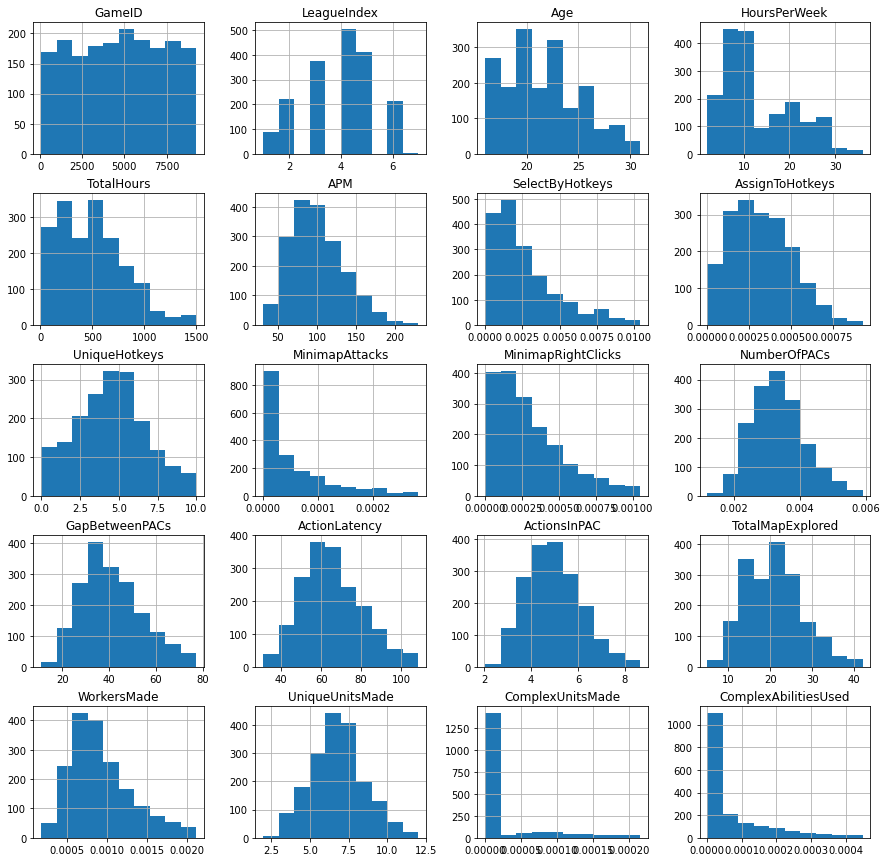

In [92]:
df_out.hist(figsize=(15,15))

In [93]:
#Dataset for the vizualisations

df_visu = df_out
#df_visu.to_csv('SkillCraft_Visu.csv')

In [94]:
df_visu.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000
11,93,4,26,4,190,79.2948,0.000379,0.000255,3,0.000016,0.000165,0.003555,39.6381,65.5000,4.2269,19,0.000757,7,0.000107,0.000263
12,97,3,18,12,350,67.4754,0.000423,0.000169,1,0.000024,0.000145,0.002885,42.4370,68.0502,4.3222,16,0.000748,7,0.000000,0.000435


## normalization

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
#normalization with MinMax method
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_out[['LeagueIndex','Age','APM', 'SelectByHotkeys', 'AssignToHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs',
                                                           'GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed','ComplexAbilitiesUsed']]))

In [97]:
import seaborn as sns

<AxesSubplot:>

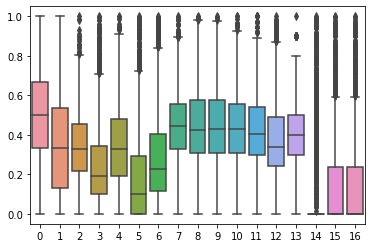

In [98]:
#distribution without outliers
new_boxplot = sns.boxplot(data=df_norm)
new_boxplot

#### After Data pre-processing, we move on the Data Visualization.

# PART II - Data Visualization

In [99]:
df

,Unnamed: 0,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
1,5,60,2,27,6,70,44.4570,0.000978,0.000255,2,...,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
2,9,81,4,18,24,800,155.9856,0.005054,0.000524,8,...,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000
3,11,93,4,26,4,190,79.2948,0.000379,0.000255,3,...,0.000165,0.003555,39.6381,65.5000,4.2269,19,0.000757,7,0.000107,0.000263
4,12,97,3,18,12,350,67.4754,0.000423,0.000169,1,...,0.000145,0.002885,42.4370,68.0502,4.3222,16,0.000748,7,0.000000,0.000435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,3333,9256,4,21,6,560,88.4742,0.002332,0.000522,3,...,0.000228,0.003433,34.0286,63.7720,4.3420,29,0.000783,9,0.000204,0.000228
1818,3334,9260,4,23,36,1500,96.6198,0.001471,0.000371,3,...,0.000286,0.002614,47.2967,82.3825,6.0383,22,0.000514,5,0.000000,0.000000
1819,3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,...,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.000000,0.000000
1820,3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,...,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.000000,0.000000


### The first few visualizations show some histograms and PieChart according to several variables to give an idea of the data in general.

Text(0.5, 1.0, "Histogramme du nombre d'heure de jeu par semaine en moyenne en fonction de l'age du joueur")

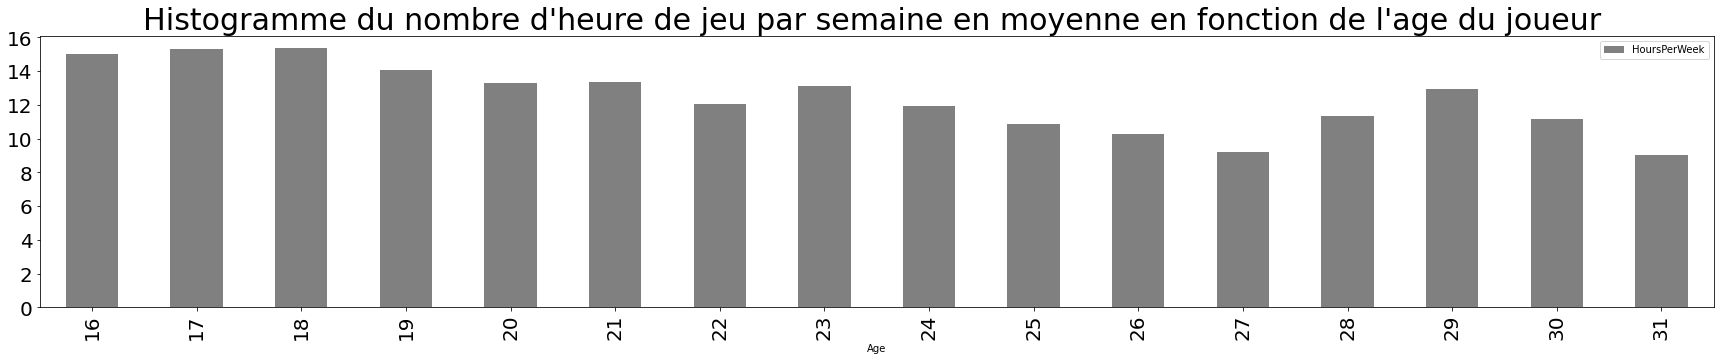

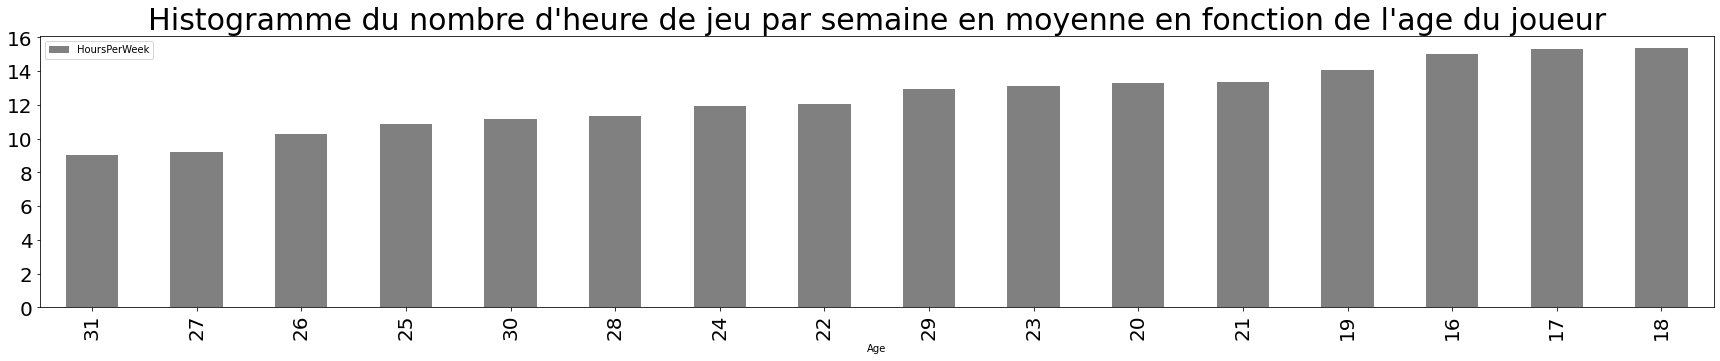

In [100]:
vf_dp = df[["Age","HoursPerWeek"]] 
vf_dp = vf_dp.groupby("Age").mean()
temp = vf_dp.index.tolist()

vf_dp.plot(kind="bar",y="HoursPerWeek", figsize=(30,5), color="grey")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme du nombre d'heure de jeu par semaine en moyenne en fonction de l'age du joueur ",fontsize=30)

vf_dp.sort_values("HoursPerWeek").plot(kind="bar",y="HoursPerWeek", figsize=(30,5), color="grey")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme du nombre d'heure de jeu par semaine en moyenne en fonction de l'age du joueur",fontsize=30)

Text(0.5, 1.0, "Histogramme de l'apm en moyenne en fonction de l'age")

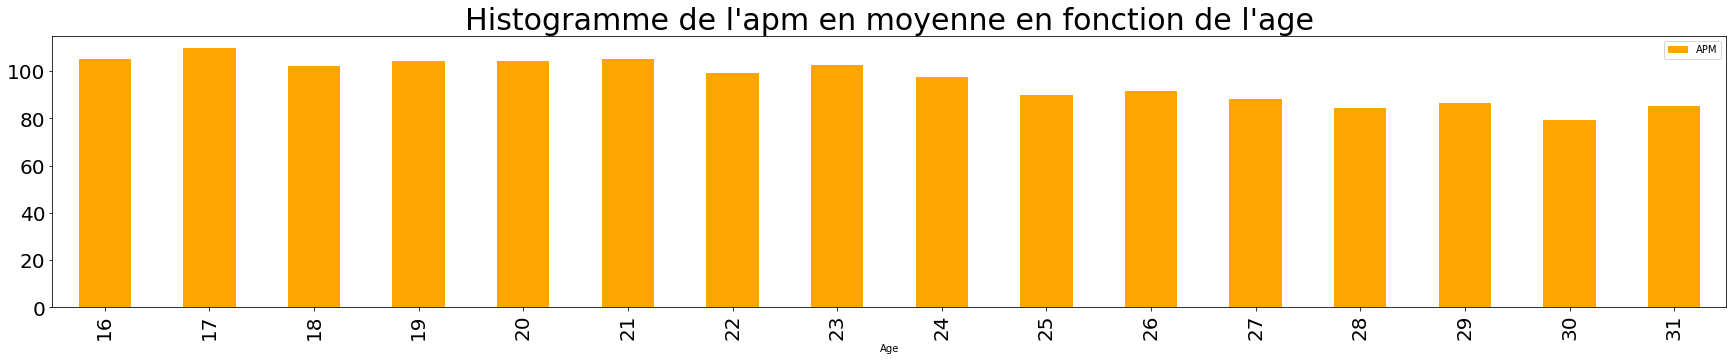

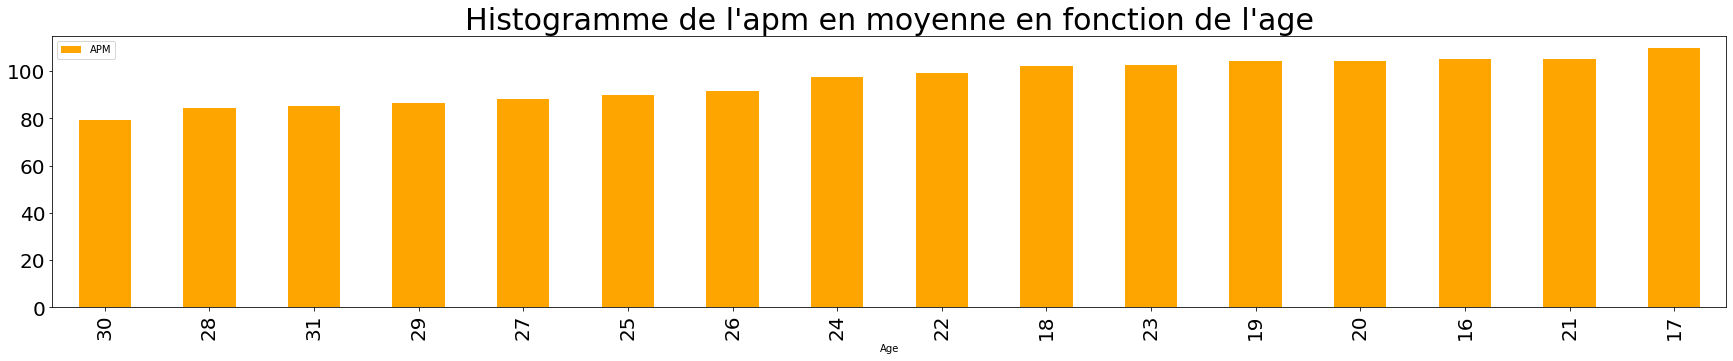

In [101]:
vf_dx = df[["Age","APM"]] 
vf_dx = vf_dx.groupby("Age").mean()
temp = vf_dx.index.tolist()

vf_dx.plot(kind="bar",y="APM", figsize=(30,5), color="orange")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme de l'apm en moyenne en fonction de l'age",fontsize=30)

vf_dx.sort_values("APM").plot(kind="bar",y="APM", figsize=(30,5), color="orange")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme de l'apm en moyenne en fonction de l'age",fontsize=30)

Text(0.5, 1.0, "Histogramme de l'apm en moyenne en fonction de l'age")

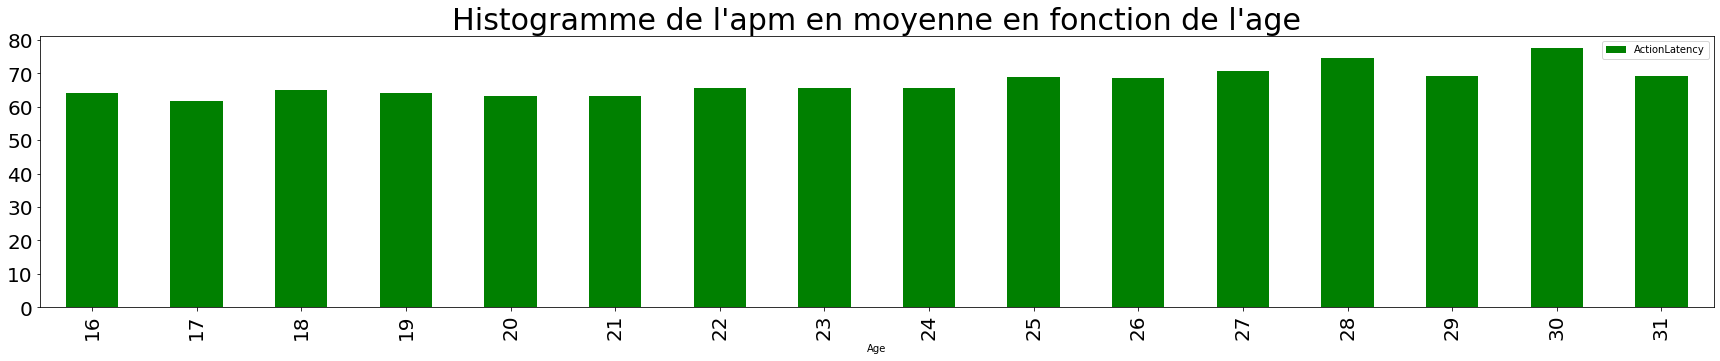

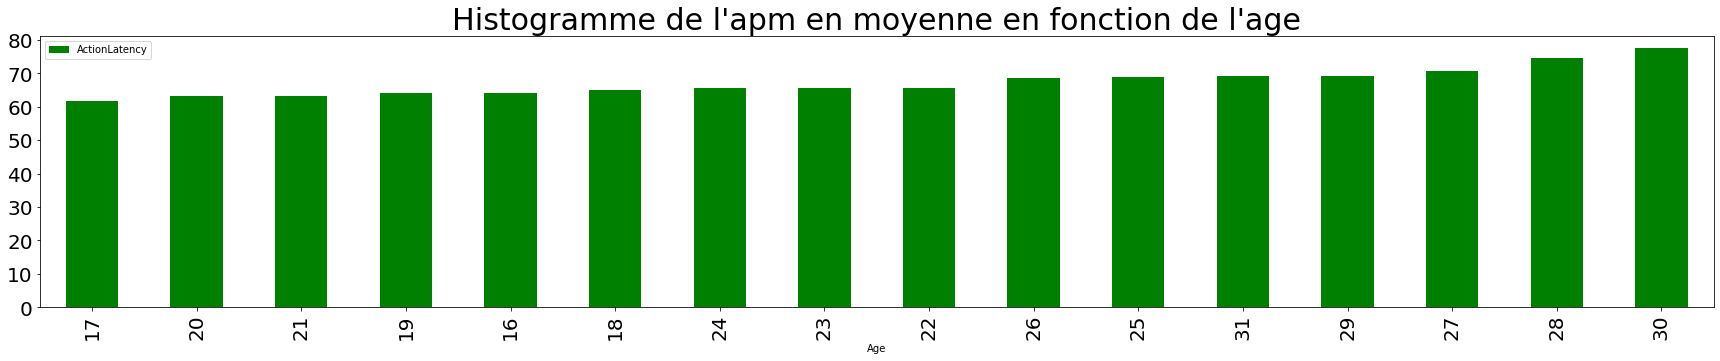

In [102]:
vf_dy = df[["Age","ActionLatency"]] 
vf_dy = vf_dy.groupby("Age").mean()
temp = vf_dy.index.tolist()

vf_dy.plot(kind="bar",y="ActionLatency", figsize=(30,5), color="green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme de l'apm en moyenne en fonction de l'age",fontsize=30)

vf_dy.sort_values("ActionLatency").plot(kind="bar",y="ActionLatency", figsize=(30,5), color="green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Histogramme de l'apm en moyenne en fonction de l'age",fontsize=30)

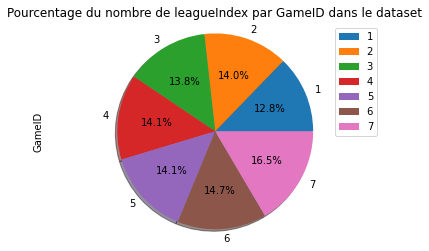

In [103]:
df.groupby(['LeagueIndex']).mean().plot(kind='pie', y='GameID',autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title("Pourcentage du nombre de leagueIndex par GameID dans le dataset")
plt.show()

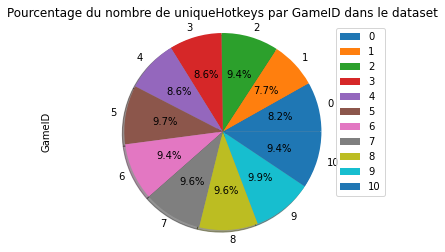

In [104]:
df.groupby(['UniqueHotkeys']).mean().plot(kind='pie', y='GameID',autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title("Pourcentage du nombre de uniqueHotkeys par GameID dans le dataset")
plt.show()

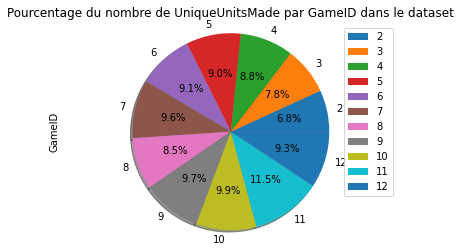

In [105]:
df.groupby(['UniqueUnitsMade']).mean().plot(kind='pie', y='GameID',autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title("Pourcentage du nombre de UniqueUnitsMade par GameID dans le dataset")
plt.show()

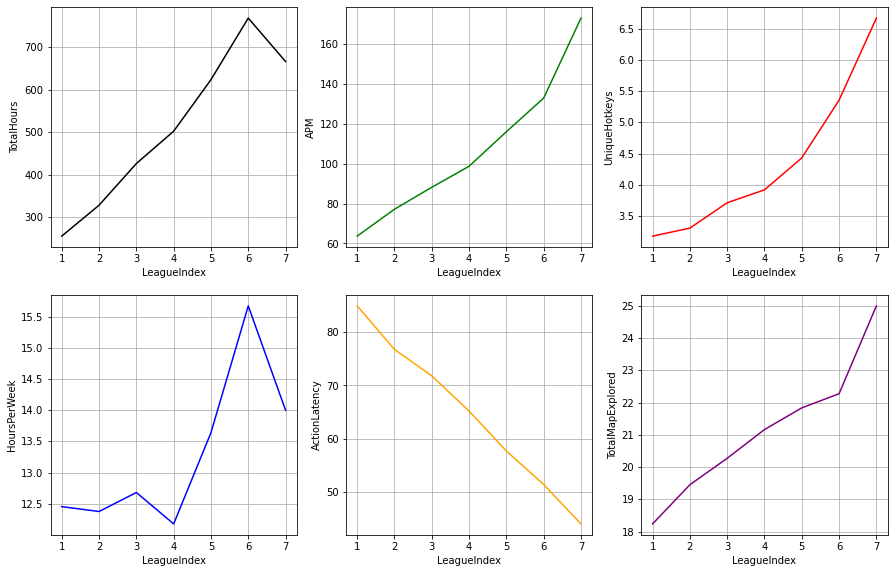

In [106]:
plt.subplot(3,3,1)
df.groupby("LeagueIndex")["TotalHours"].mean().plot(color = "black",figsize=(15,15))
plt.ylabel("TotalHours")
plt.grid(True)

plt.subplot(3,3,2)
df.groupby("LeagueIndex")["APM"].mean().plot(color = "green")
plt.ylabel("APM")
plt.grid(True)

plt.subplot(3,3,3)
df.groupby("LeagueIndex")["UniqueHotkeys"].mean().plot(color = "red")
plt.ylabel("UniqueHotkeys")
plt.grid(True)

plt.subplot(3,3,4)
df.groupby("LeagueIndex")["HoursPerWeek"].mean().plot(color = "blue")
plt.ylabel("HoursPerWeek")
plt.grid(True)

plt.subplot(3,3,5)
df.groupby("LeagueIndex")["ActionLatency"].mean().plot(color = "orange")
plt.ylabel("ActionLatency")
plt.grid(True)

plt.subplot(3,3,6)
df.groupby("LeagueIndex")["TotalMapExplored"].mean().plot(color = "purple")
plt.ylabel("TotalMapExplored")
plt.grid(True)

### On these plots, we have each variable according to the variable leagueIndex. We can note that the variable ActionLatency is close to a linear line.

In [107]:
temp = df.groupby(['ActionLatency','LeagueIndex']).mean()
fig = px.scatter(temp, x=df["ActionLatency"].head(1000), y=df["APM"].head(1000), color=df["LeagueIndex"].head(1000), 
                 height=700, hover_name= df["LeagueIndex"].head(1000), log_x=True, log_y=True, 
                 title='Nombre APM en fonction de actionlatency des 1000 premieres lignes de LeagueIndex',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(textposition='top center')
fig.show()

### The strength of a scatter plot is assessed by the dispersion of its points. Indeed, if the points are very scattered, the relationship between the variables is weak. If the points are concentrated around a straight line, the relationship between the variables is strong.
### Moreover, we are here in the presence of a linear relation.

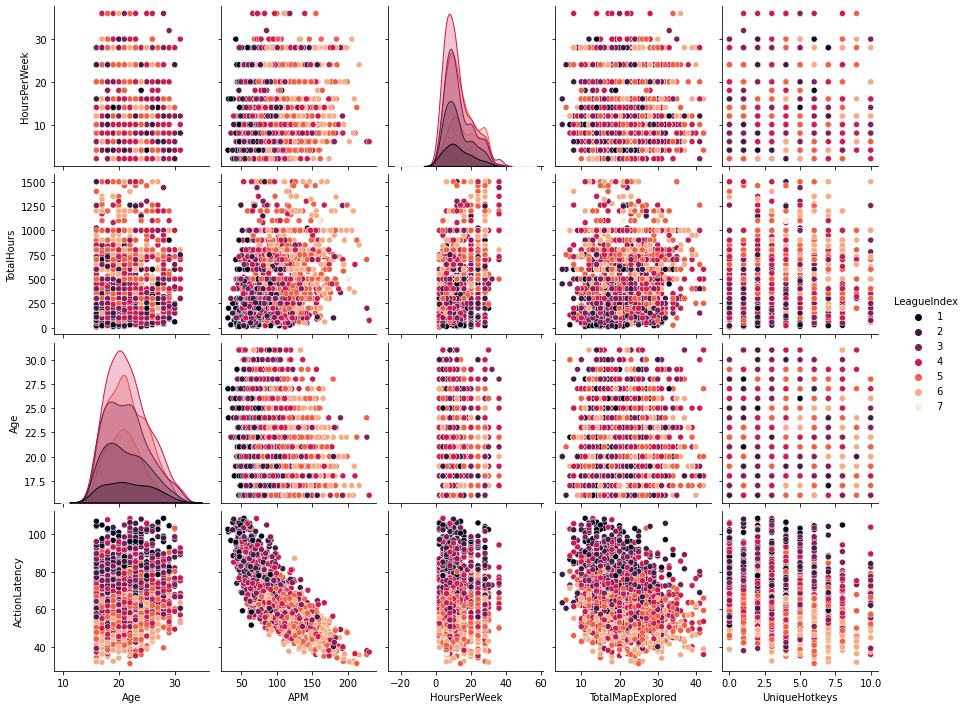

In [108]:
sns.pairplot(df,hue='LeagueIndex', x_vars=['Age','APM','HoursPerWeek','TotalMapExplored','UniqueHotkeys'],y_vars=['HoursPerWeek','TotalHours','Age','ActionLatency'], height=2.5, palette="rocket");

### To plot multiple pairwise bivariate distributions in a dataset, we can use the pairplot() function. This shows the relationship for (n, 2) combination of variables in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

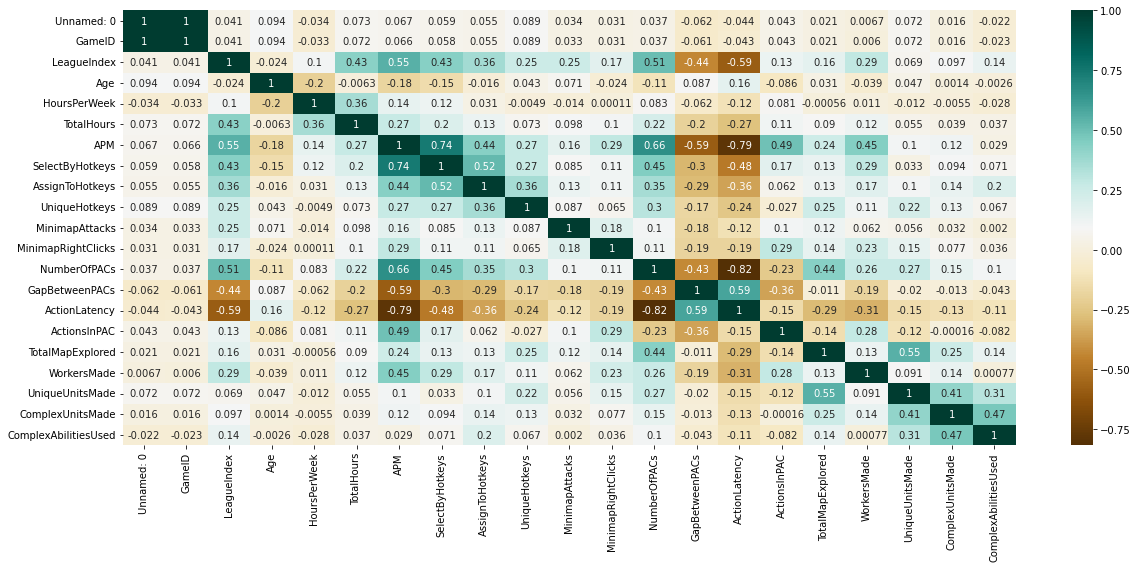

In [109]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),annot=True,cmap='BrBG');

### Here using this visualization we can see the correlation between the variables, the target variable that interests us being LeagueIndex, we notice three variables that stand out from the others: ActionLatency, APM and NumberOfPACS.

#### After Data Visualization, we move on the modeling part .


# PART III : Modeling

### Split of the dataset 

Modeling: use the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics: 30%  

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
#dropping id columns
#df_norm.drop(["GameID"], axis=1,inplace=True)

In [112]:
df_norm.columns =['LeagueIndex','Age','APM', 'SelectByHotkeys', 'AssignToHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs',
                                                           'GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed','ComplexAbilitiesUsed']

In [113]:
df_norm

,LeagueIndex,Age,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,ComplexAbilitiesUsed
0,0.333333,0.200000,0.385358,0.098975,0.229338,0.188087,0.515695,0.551739,0.276620,0.293299,0.434400,0.378378,0.125872,0.5,0.000000,0.854089,0.854089
1,0.166667,0.733333,0.068040,0.093694,0.274679,0.000000,0.000000,0.263414,0.987935,0.873244,0.159710,0.297297,0.097986,0.4,0.000000,0.000000,0.000000
2,0.500000,0.133333,0.628500,0.483978,0.564043,0.088112,0.378956,0.506379,0.204960,0.272935,0.683706,0.594595,0.582511,0.4,0.000000,0.000000,0.000000
3,0.500000,0.666667,0.243109,0.036250,0.274539,0.058105,0.156188,0.503415,0.433551,0.444796,0.330414,0.378378,0.296772,0.5,0.494761,0.586337,0.586337
4,0.333333,0.133333,0.183713,0.040462,0.181886,0.085240,0.137477,0.361199,0.475713,0.477636,0.344805,0.297297,0.292325,0.5,0.000000,0.967669,0.967669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,0.500000,0.333333,0.289238,0.223359,0.561706,0.230335,0.216702,0.477594,0.349051,0.422545,0.347795,0.648649,0.310113,0.7,0.942927,0.508450,0.508450
1818,0.500000,0.466667,0.330171,0.140892,0.399683,0.000000,0.271112,0.303606,0.548919,0.662195,0.603957,0.459459,0.171339,0.3,0.000000,0.000000,0.000000
1819,0.500000,0.333333,0.456202,0.283075,0.259210,0.193259,0.197405,0.531983,0.372471,0.347683,0.509891,0.486486,0.946232,0.5,0.000000,0.000000,0.000000
1820,0.333333,0.266667,0.519448,0.519371,0.195489,0.000000,0.455587,0.429058,0.112008,0.405669,0.601223,0.351351,0.388250,0.3,0.000000,0.000000,0.000000


In [114]:
X= df_norm.drop('LeagueIndex',axis=1)
print(X.shape);

y = df_norm.LeagueIndex
print(y.shape);

(1822, 16)
(1822,)


In [115]:
from sklearn.model_selection import train_test_split

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1457, 16)
(365, 16)
(1457,)
(365,)


We are going to create an array in order to stock our MSE values.

In [117]:
MSE_values=np.array([])
MSE_values_Grid=np.array([])

### Train or fit the data into a model

In [118]:
X_train

,Age,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,ComplexAbilitiesUsed
65,0.266667,0.192261,0.031658,0.028462,0.326791,0.188234,0.172535,0.501266,0.804120,0.645183,0.270270,0.158442,0.2,0.000000,0.000000,0.000000
29,0.000000,0.392576,0.411864,0.191407,0.000000,0.000000,0.469536,0.266598,0.414444,0.425581,0.216216,0.431848,0.4,0.000000,0.180007,0.180007
1329,0.000000,0.474878,0.236588,0.186410,0.000000,0.415272,0.613848,0.312818,0.245373,0.459665,0.621622,0.635556,0.7,0.337299,0.101494,0.101494
1312,0.133333,0.490125,0.636979,0.660371,0.129981,0.815252,0.561596,0.347942,0.323124,0.410375,0.432432,0.476215,0.7,0.000000,0.054653,0.054653
1537,0.400000,0.110409,0.208556,0.242459,0.198847,0.124718,0.079436,0.369196,0.934361,0.450800,0.189189,0.216043,0.3,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.066667,0.215110,0.024892,0.039962,0.000000,0.359438,0.450297,0.400054,0.497824,0.307354,0.513514,0.078348,0.5,0.343468,0.066144,0.066144
709,0.133333,0.345102,0.234308,0.361416,0.042344,0.034147,0.454009,0.272864,0.299219,0.450438,0.351351,0.376546,0.4,0.000000,0.000000,0.000000
439,0.400000,0.407022,0.096141,0.360146,0.000000,0.167148,0.582564,0.055486,0.174867,0.478994,0.270270,0.351500,0.5,0.000000,0.235310,0.235310
174,0.066667,0.539860,0.243856,0.465204,0.388463,0.395305,0.831648,0.281577,0.110001,0.407143,0.540541,0.323857,0.5,0.036349,0.000000,0.000000


# CLASSIFICATION

In [126]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed_train = lab.fit_transform(y_train)
y_transformed_test = lab.fit_transform(y_test)
y_test = y_transformed_test
y_train = y_transformed_train

#view transformed values
print(y_transformed_train)


[3 1 2 ... 4 5 1]


In [127]:
accuracy_values=np.array([])
accuracy_grid=np.array([])
accuracy_selection=np.array([])

### LogisticRegression

In [131]:
from sklearn.linear_model import LogisticRegression

model_log_clf = LogisticRegression()
model_log_clf.fit(X_train, y_train)

y_pred = model_log_clf.predict(X_test)

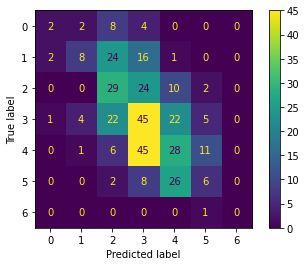

In [132]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_log_clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log_clf.classes_)
disp.plot()
plt.show()

In [133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3232876712328767


In [134]:
accuracy_values=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_values

array([0.32328767])

#### GridSearch Tunning

In [135]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

model_log_clf_tunned = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,
    n_jobs=5,
    verbose=1)

model_log_clf_tunned.fit(X_train, y_train)
print(model_log_clf_tunned.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 11.288378916846883, 'penalty': 'l2', 'solver': 'liblinear'}


#### New model with best parameters

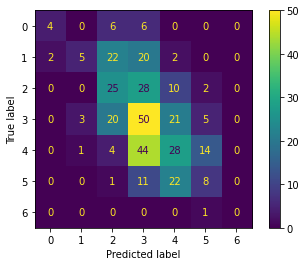

Accuracy: 0.3287671232876712


In [136]:
from sklearn.linear_model import LogisticRegression

model_log_clf_tunned = LogisticRegression(C= 11.288378916846883, penalty= 'l2', solver= 'liblinear')
model_log_clf_tunned.fit(X_train, y_train)

y_pred = model_log_clf_tunned.predict(X_test)


# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_log_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log_clf_tunned.classes_)
disp.plot()
plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [137]:
accuracy_grid=np.append(accuracy_grid,metrics.accuracy_score(y_test, y_pred))
accuracy_grid                  

array([0.32876712])

### DecisionTreeClassifier

In [139]:
from sklearn.tree import DecisionTreeClassifier

model_tree_clf = DecisionTreeClassifier()
model_tree_clf.fit(X_train, y_train)

y_pred = model_tree_clf.predict(X_test)


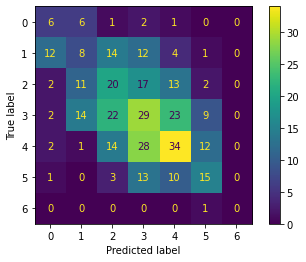

In [140]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_tree_clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tree_clf.classes_)
disp.plot()
plt.show()

In [141]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30684931506849317


In [142]:
accuracy_values=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_values

array([0.32328767, 0.30684932])

#### GridSearch Tunning

In [143]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

model_tree_clf_tunned = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

model_tree_clf_tunned.fit(X_train, y_train)
print(model_tree_clf_tunned.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}


#### New model with best parameters

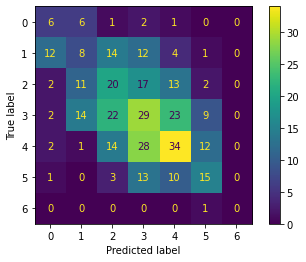

Accuracy: 0.30684931506849317


In [144]:
from sklearn.tree import DecisionTreeClassifier

model_tree_clf_tunned = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= None, splitter= 'best')
model_tree_clf_tunned.fit(X_train, y_train)

y_pred = model_tree_clf.predict(X_test)


# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_tree_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tree_clf_tunned.classes_)
disp.plot()
plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [145]:
accuracy_grid=np.append(accuracy_grid,metrics.accuracy_score(y_test, y_pred))
accuracy_grid    

array([0.32876712, 0.30684932])

### RandomForestClassifier

In [146]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model_forest_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_forest_clf.fit(X_train,y_train)

y_pred=model_forest_clf.predict(X_test)

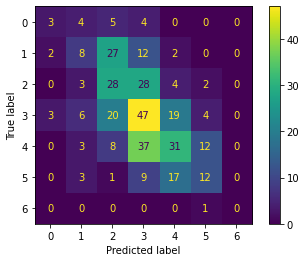

In [147]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_forest_clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_forest_clf.classes_)
disp.plot()
plt.show()

In [148]:
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.35342465753424657


In [149]:
accuracy_values=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_values

array([0.32328767, 0.30684932, 0.35342466])

#### GridSearch Tunning

In [150]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
#{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 

model_forest_clf_tunned = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=5,
    verbose=1)

model_forest_clf_tunned.fit(X_train, y_train)
print(model_forest_clf_tunned.best_params_)



Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


#### New model with best parameters

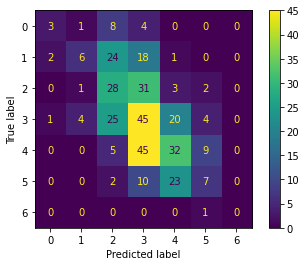

Accuracy: 0.3315068493150685


In [151]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model_forest_clf_tunned=RandomForestClassifier(criterion='gini', max_depth= 5, max_features= 'auto', n_estimators= 200)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_forest_clf_tunned.fit(X_train,y_train)

y_pred=model_forest_clf_tunned.predict(X_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_forest_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_forest_clf_tunned.classes_)
disp.plot()
plt.show()



#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [152]:
accuracy_grid=np.append(accuracy_grid,metrics.accuracy_score(y_test, y_pred))
accuracy_grid    

array([0.32876712, 0.30684932, 0.33150685])

### AdaBoostClassifier

In [153]:
# importing the classifier
from sklearn.ensemble import AdaBoostClassifier
# initailizing the ada boost classifier with 1 stump trees
model_Ada_clf = AdaBoostClassifier(n_estimators=1)

model_Ada_clf = model_Ada.fit(X_train, y_train)
y_pred = model_Ada.predict(X_test)


NameError: name 'model_Ada' is not defined

In [ ]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_Ada_clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Ada_clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

In [ ]:
#accuracy_values=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
#accuracy_values

#### GridSearch Tunning

In [ ]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]}

model_Ada_clf_tunned = AdaBoostRegressor()

model_Ada_clf_tunned = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=5,
    verbose=1)

model_Ada_clf_tunned.fit(X_train, y_train)
print(model_Ada_clf_tunned.best_params_)

#### New model with best parameters

In [ ]:
# importing the classifier
from sklearn.ensemble import AdaBoostClassifier
# initailizing the ada boost classifier with 1 stump trees
model_Ada_clf_tunned = AdaBoostClassifier(n_estimators=1)

model_Ada_clf_tunned = model_Ada.fit(X_train, y_train)
y_pred = model_Ada_clf_tunned.predict(X_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test,y_pred, labels=model_Ada_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Ada_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

### KNNClassifier

In [154]:
# importing the classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


# initailizing the ada boost classifier with 1 stump trees
model_knn_clf = KNeighborsClassifier()

model_knn_clf = model_knn_clf.fit(X_train, y_train)
y_pred = model_knn_clf.predict(X_test)

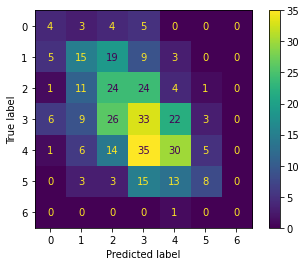

In [155]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_knn_clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn_clf.classes_)
disp.plot()
plt.show()

In [156]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31232876712328766


In [157]:
accuracy_values=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_values

array([0.32328767, 0.30684932, 0.35342466, 0.31232877])

#### GridSearch Tunning

In [158]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


model_knn_clf_tunned = KNeighborsClassifier()

model_knn_clf_tunned = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=5,
    verbose=1)

model_knn_clf_tunned.fit(X_train, y_train)
print(model_knn_clf_tunned.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 27}


#### New model with best parameters

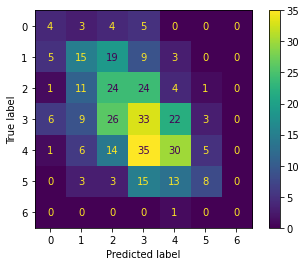

Accuracy: 0.31232876712328766


In [159]:
# importing the classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


# initailizing the ada boost classifier with 1 stump trees
model_knn_clf_tunned = KNeighborsClassifier(n_neighbors= 27)

model_knn_clf_tunned = model_knn_clf.fit(X_train, y_train)
y_pred = model_knn_clf_tunned.predict(X_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_knn_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn_clf_tunned.classes_)
disp.plot()
plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [160]:
accuracy_grid=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_grid

array([0.32328767, 0.30684932, 0.35342466, 0.31232877, 0.31232877])

### Finding Important Features

In [161]:
import pandas as pd
feature_imp = pd.Series(model_forest_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ActionLatency           0.102227
APM                     0.091047
NumberOfPACs            0.081455
SelectByHotkeys         0.080547
GapBetweenPACs          0.076938
AssignToHotkeys         0.072055
WorkersMade             0.070612
ActionsInPAC            0.067821
MinimapRightClicks      0.065101
MinimapAttacks          0.065055
TotalMapExplored        0.052819
Age                     0.049309
UniqueUnitsMade         0.036438
ComplexAbilitiesUsed    0.034682
ComplexAbilitiesUsed    0.034232
ComplexUnitsMade        0.019660
dtype: float64

No handles with labels found to put in legend.


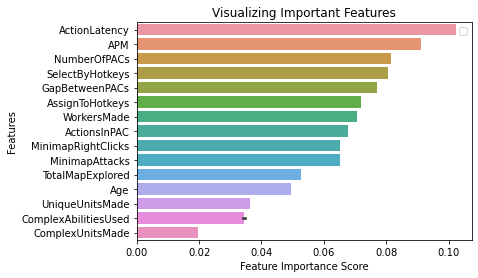

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [163]:
X_best_features_train=X_train.drop(['ComplexUnitsMade','ComplexAbilitiesUsed','UniqueUnitsMade','Age','TotalMapExplored','MinimapAttacks','ActionsInPAC','MinimapRightClicks','WorkersMade','AssignToHotkeys','GapBetweenPACs','SelectByHotkeys'],axis=1)
X_best_features_test=X_test.drop(['ComplexUnitsMade','ComplexAbilitiesUsed','UniqueUnitsMade','Age','TotalMapExplored','MinimapAttacks','ActionsInPAC','MinimapRightClicks','WorkersMade','AssignToHotkeys','GapBetweenPACs','SelectByHotkeys'],axis=1)

#### LogisticRegression

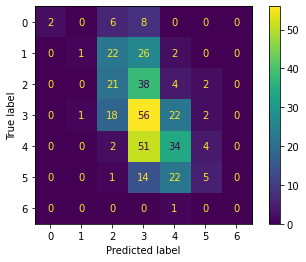

The accuracy is:   0.32602739726027397


In [164]:
model_log_clf_tunned.fit(X_best_features_train,y_train)
y_pred = model_log_clf_tunned.predict(X_best_features_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_log_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

In [165]:
accuracy_selection=np.append(accuracy_selection, accuracy_score(y_test, y_pred))
accuracy_selection

array([0.3260274])

#### DecisionTreeClassifier


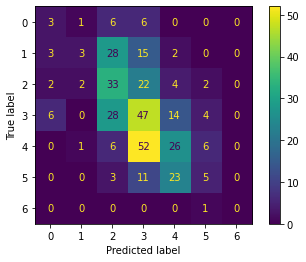

The accuracy is:   0.32054794520547947


In [166]:
model_tree_clf_tunned.fit(X_best_features_train,y_train)
y_pred = model_tree_clf_tunned.predict(X_best_features_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_tree_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tree_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

In [167]:
accuracy_selection=np.append(accuracy_selection, accuracy_score(y_test, y_pred))
accuracy_selection

array([0.3260274 , 0.32054795])

#### RandomForestClassifier

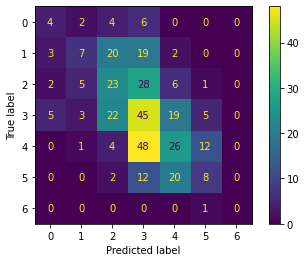

The accuracy is:   0.3095890410958904


In [168]:
model_forest_clf_tunned.fit(X_best_features_train,y_train)
y_pred = model_forest_clf_tunned.predict(X_best_features_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_forest_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_forest_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

In [169]:
accuracy_selection=np.append(accuracy_selection, accuracy_score(y_test, y_pred))
accuracy_selection

array([0.3260274 , 0.32054795, 0.30958904])

#### AdaBoostClassifier

In [170]:
model_Ada_clf_tunned.fit(X_best_features_train,y_train)
y_pred = model_Ada_clf_tunned.predict(X_best_features_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_Ada_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Ada_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

NameError: name 'model_Ada_clf_tunned' is not defined

In [171]:
accuracy_selection=np.append(accuracy_selection, accuracy_score(y_test, y_pred))
accuracy_selection

array([0.3260274 , 0.32054795, 0.30958904, 0.30958904])

#### KNN

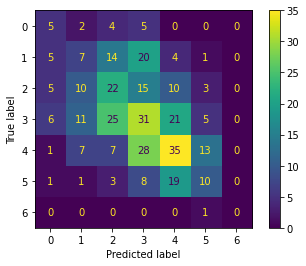

The accuracy is:   0.3013698630136986


In [172]:
model_knn_clf_tunned.fit(X_best_features_train,y_train)
y_pred = model_knn_clf_tunned.predict(X_best_features_test)

# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model_knn_clf_tunned.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn_clf_tunned.classes_)
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
#The best performance is 1 with
print("The accuracy is:  ", accuracy_score(y_test, y_pred))

In [173]:
accuracy_selection=np.append(accuracy_values,metrics.accuracy_score(y_test, y_pred))
accuracy_selection

array([0.32328767, 0.30684932, 0.35342466, 0.31232877, 0.30136986])

## Comparisons

In [174]:
print(accuracy_values)
print(accuracy_grid)
print(accuracy_selection)

[0.32328767 0.30684932 0.35342466 0.31232877]
[0.32328767 0.30684932 0.35342466 0.31232877 0.31232877]
[0.32328767 0.30684932 0.35342466 0.31232877 0.30136986]


In [175]:
import pandas as pd

# Créer le dictionnaire avec les listes en tant que valeurs
data = {'accuracy_values': accuracy_values,'accuracy_grid': accuracy_grid,'accuracy_selection': accuracy_selection}

# Créer le dataframe
df_comparaison = pd.DataFrame(data)

# Afficher le dataframe
df_comparaison



ValueError: All arrays must be of the same length

In [176]:
# Listes de valeurs pour chaque colonne
#accuracy_values = [0.32328767, 0.32328767, 0.32328767, 0.32328767, 0.32328767]
#accuracy_grid = [0.32328767, 0.32328767, 0.32328767]
#accuracy_selection = [0.32328767, 0.32328767]

# Trouver la longueur de la plus longue liste
#max_length = max(len(accuracy_values), len(accuracy_grid), len(accuracy_selection))

# Remplir les listes plus courtes avec des NaN pour qu'elles aient la même longueur que la plus longue liste
#accuracy_values = accuracy_values + [pd.np.nan] * (max_length - len(accuracy_values))
#accuracy_grid = accuracy_grid + [pd.np.nan] * (max_length - len(accuracy_grid))
#accuracy_selection = accuracy_selection + [pd.np.nan] * (max_length - len(accuracy_selection))

# Créer un dictionnaire avec les listes de valeurs pour chaque colonne
#data = {'accuracy_values': accuracy_values, 'accuracy_grid': accuracy_grid, 'accuracy_selection': accuracy_selection}

# Créer un dataframe Pandas en utilisant le dictionnaire
#df = pd.DataFrame(data)

# Afficher le dataframe
#print(df)

